<a href="https://colab.research.google.com/github/Soob00/20251R0136COSE47101/blob/viz/viz/dataset1_visualization_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('anxiety_depression_data.csv')
df.head()


,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


In [ ]:
# 분석 대상 컬럼 지정
negative_scores = ['Anxiety_Score', 'Depression_Score', 'Loneliness_Score']
positive_scores = ['Self_Esteem_Score', 'Life_Satisfaction_Score']

# 부정적 점수 간의 상관관계
negative_corr = df[negative_scores].corr()

# 긍정적 점수 간의 상관관계
positive_corr = df[positive_scores].corr()

# 긍정 vs 부정 점수 간의 상관관계
cross_corr = df[negative_scores + positive_scores].corr().loc[negative_scores, positive_scores]

import matplotlib.pyplot as plt

# 시각화 함수
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(6, 4))
    plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar(label='Correlation Coefficient')
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
    plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
    plt.title(title)
    plt.tight_layout()
    plt.show()

### **부정적인 점수 사이의 연관관계**

부정적인 점수들 사이의 연관관계가 너무 낮은데...?

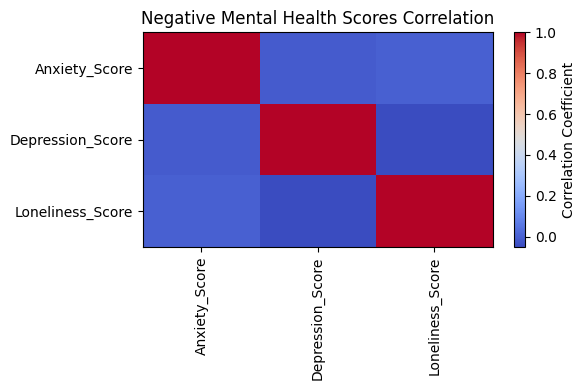

In [ ]:
plot_heatmap(negative_corr, "Negative Mental Health Scores Correlation")

스케일링을 해서 했는데도 너무 상관관계가 낮아요..,

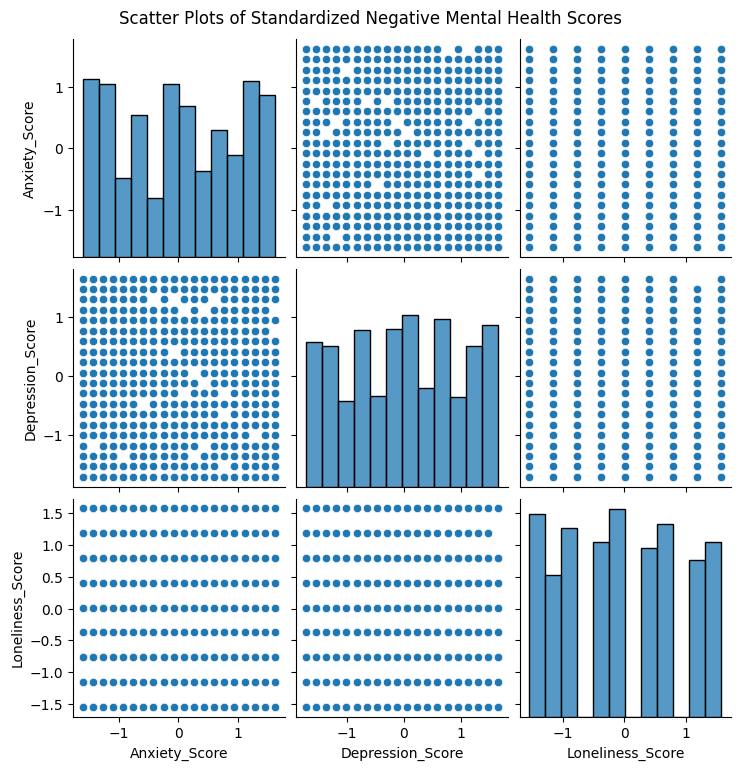

,Anxiety_Score,Depression_Score,Loneliness_Score
Anxiety_Score,1.000000,-0.011553,0.000881
Depression_Score,-0.011553,1.000000,-0.050192
Loneliness_Score,0.000881,-0.050192,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 표준화(Z-score normalization)
scaler = StandardScaler()
standardized_scores = scaler.fit_transform(df[core_negative_scores])
standardized_df = pd.DataFrame(standardized_scores, columns=core_negative_scores)

# 상관관계 재계산
standardized_corr = standardized_df.corr()

# 산점도 시각화 (pairplot)
sns.pairplot(standardized_df)
plt.suptitle("Scatter Plots of Standardized Negative Mental Health Scores", y=1.02)
plt.show()

# 상관계수 출력
standardized_corr


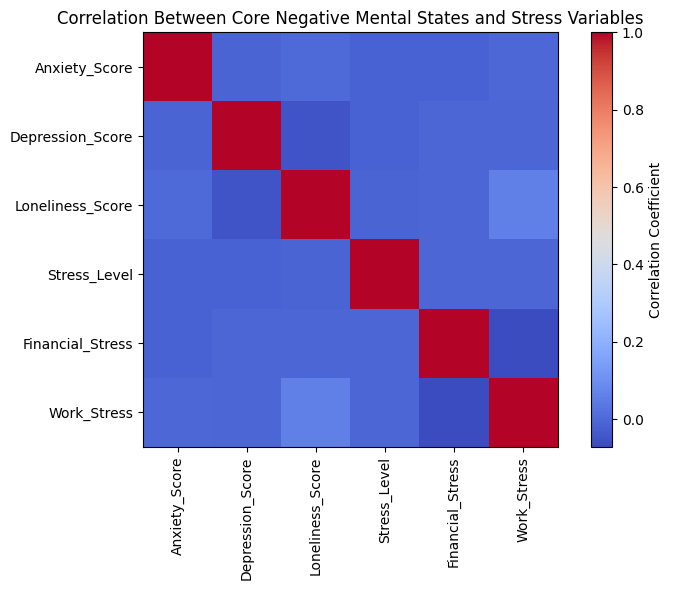

In [ ]:
# 상관관계 분석 대상 변수 지정
core_negative_scores = ['Anxiety_Score', 'Depression_Score', 'Loneliness_Score']
stress_related = ['Stress_Level', 'Financial_Stress', 'Work_Stress']

# 전체 부정적 변수로 상관관계 계산
all_negative_related = core_negative_scores + stress_related
neg_corr_matrix = df[all_negative_related].corr()

# 시각화
plt.figure(figsize=(8, 6))
plt.imshow(neg_corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(all_negative_related)), all_negative_related, rotation=90)
plt.yticks(range(len(all_negative_related)), all_negative_related)
plt.title("Correlation Between Core Negative Mental States and Stress Variables")
plt.tight_layout()
plt.show()


더 많은 부정적인 변수들로 해봤는데, 여전히 상관관계가 loneliness-work stress 사이에서만 조오금 높은 상관관계가 나타남.. 근데 저 외로움과 work stress 사이에서 상관관계가 나타날 수 있어..?

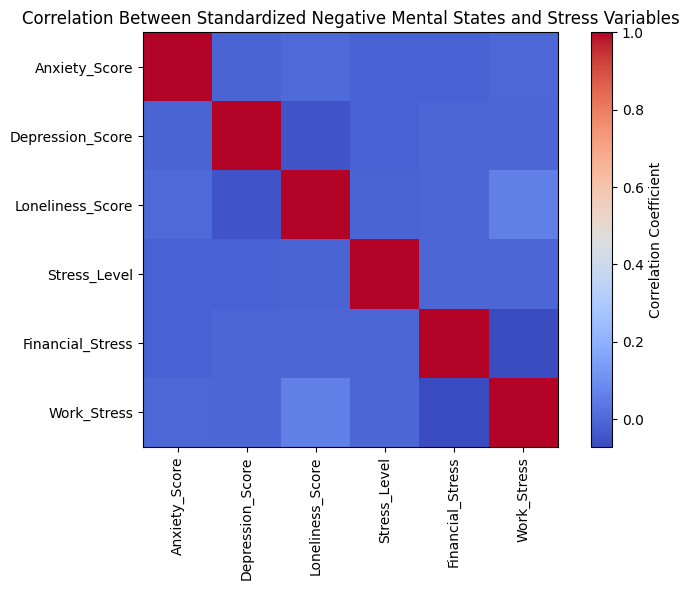

,Anxiety_Score,Depression_Score,Loneliness_Score,Stress_Level,Financial_Stress,Work_Stress
Anxiety_Score,1.000000,-0.011553,0.000881,-0.015035,-0.016597,-0.002243
Depression_Score,-0.011553,1.000000,-0.050192,-0.013922,-0.006397,-0.004496
Loneliness_Score,0.000881,-0.050192,1.000000,-0.012158,-0.006443,0.058510
Stress_Level,-0.015035,-0.013922,-0.012158,1.000000,-0.007481,-0.007726
Financial_Stress,-0.016597,-0.006397,-0.006443,-0.007481,1.000000,-0.071406
Work_Stress,-0.002243,-0.004496,0.058510,-0.007726,-0.071406,1.000000


In [ ]:
# 결합 변수 목록
core_negative_scores = ['Anxiety_Score', 'Depression_Score', 'Loneliness_Score']
stress_related = ['Stress_Level', 'Financial_Stress', 'Work_Stress']
all_negative_related = core_negative_scores + stress_related

# 표준화
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df[all_negative_related])
standardized_df = pd.DataFrame(standardized_data, columns=all_negative_related)

# 상관관계 재계산
neg_corr_matrix_std = standardized_df.corr()

# 시각화
plt.figure(figsize=(8, 6))
plt.imshow(neg_corr_matrix_std, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(all_negative_related)), all_negative_related, rotation=90)
plt.yticks(range(len(all_negative_related)), all_negative_related)
plt.title("Correlation Between Standardized Negative Mental States and Stress Variables")
plt.tight_layout()
plt.show()

# 상관계수 출력
neg_corr_matrix_std


### **긍정적인 변수 사이의 상관관계**

얘네도 상관관계가 너무 없어요..


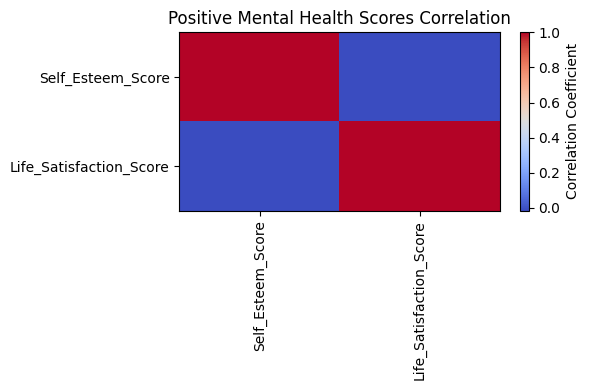

In [ ]:
plot_heatmap(positive_corr, "Positive Mental Health Scores Correlation")

이렇게 변수 좀 더 넣어도 마찬가지..,

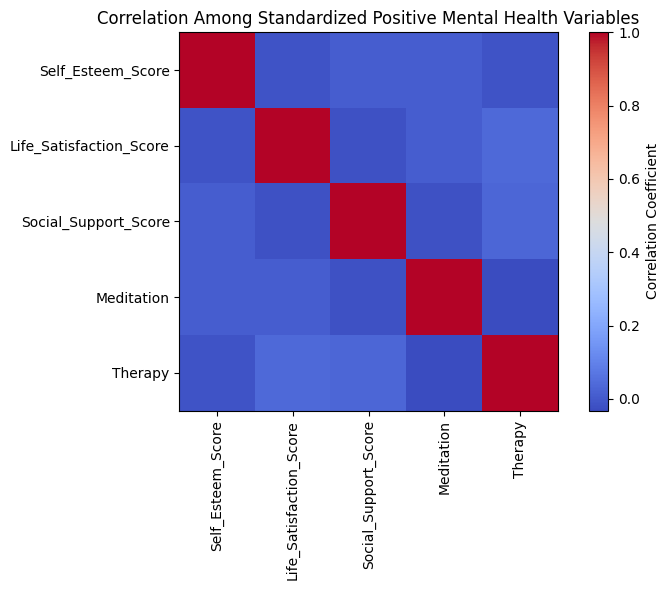

,Self_Esteem_Score,Life_Satisfaction_Score,Social_Support_Score,Meditation,Therapy
Self_Esteem_Score,1.000000,-0.014871,0.010292,0.010129,-0.015160
Life_Satisfaction_Score,-0.014871,1.000000,-0.016505,0.010281,0.037242
Social_Support_Score,0.010292,-0.016505,1.000000,-0.016905,0.029426
Meditation,0.010129,0.010281,-0.016905,1.000000,-0.031709
Therapy,-0.015160,0.037242,0.029426,-0.031709,1.000000


In [ ]:
user_positive = ['Self_Esteem_Score', 'Life_Satisfaction_Score']

# 긍정 변수 추가: Social_Support_Score, Meditation, Therapy
extra_positive = ['Social_Support_Score', 'Meditation', 'Therapy']

# 전체 긍정 변수 목록
all_positive_vars = user_positive + extra_positive

# 표준화
scaler = StandardScaler()
standardized_pos_data = scaler.fit_transform(df[all_positive_vars])
standardized_pos_df = pd.DataFrame(standardized_pos_data, columns=all_positive_vars)

# 상관관계 계산
positive_corr_matrix = standardized_pos_df.corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
plt.imshow(positive_corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(all_positive_vars)), all_positive_vars, rotation=90)
plt.yticks(range(len(all_positive_vars)), all_positive_vars)
plt.title("Correlation Among Standardized Positive Mental Health Variables")
plt.tight_layout()
plt.show()

# 상관계수 출력
positive_corr_matrix


### 전체 사이의 상관관계

음.. 얘네도 상관관계가 없어요..

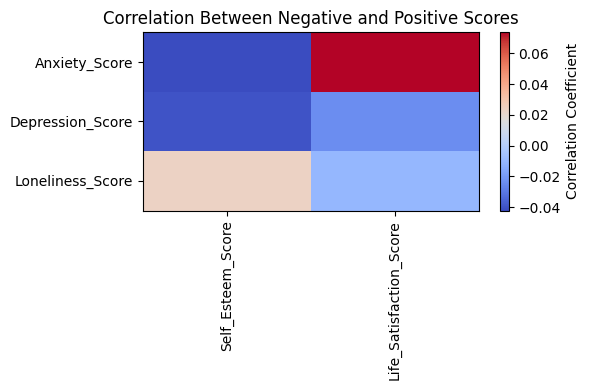

In [ ]:
plot_heatmap(cross_corr, "Correlation Between Negative and Positive Scores")

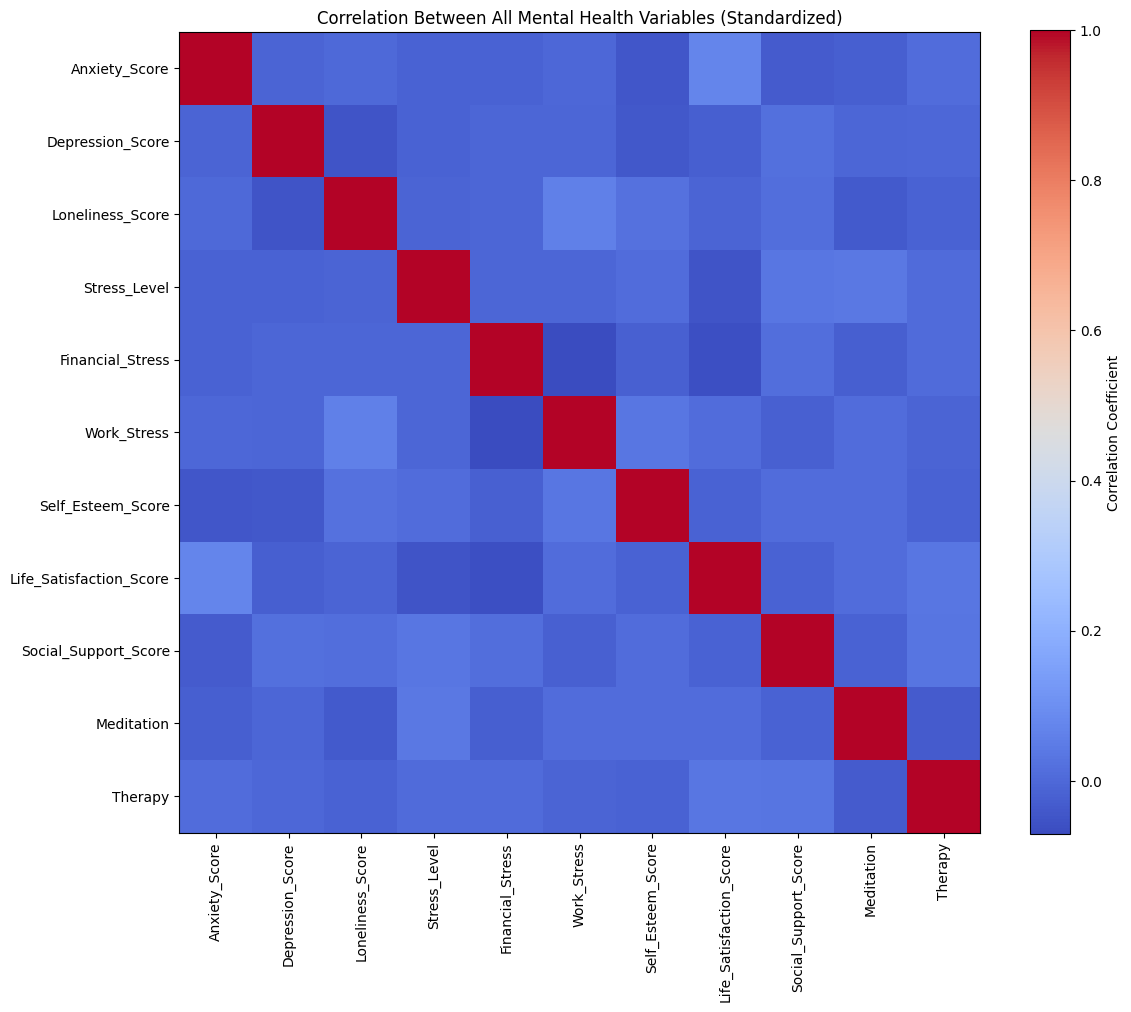

,Anxiety_Score,Depression_Score,Loneliness_Score,Stress_Level,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Social_Support_Score,Meditation,Therapy
Anxiety_Score,1.000000,-0.011553,0.000881,-0.015035,-0.016597,-0.002243,-0.042149,0.073642,-0.030583,-0.023364,0.011274
Depression_Score,-0.011553,1.000000,-0.050192,-0.013922,-0.006397,-0.004496,-0.040272,-0.024433,0.017442,-0.007533,-0.000687
Loneliness_Score,0.000881,-0.050192,1.000000,-0.012158,-0.006443,0.058510,0.023372,-0.010132,0.016255,-0.036112,-0.016517
Stress_Level,-0.015035,-0.013922,-0.012158,1.000000,-0.007481,-0.007726,0.011803,-0.047067,0.035788,0.039972,0.005475
Financial_Stress,-0.016597,-0.006397,-0.006443,-0.007481,1.000000,-0.071406,-0.017476,-0.062243,0.015591,-0.023921,0.007023
Work_Stress,-0.002243,-0.004496,0.058510,-0.007726,-0.071406,1.000000,0.035870,0.010188,-0.020698,0.010085,-0.011307
Self_Esteem_Score,-0.042149,-0.040272,0.023372,0.011803,-0.017476,0.035870,1.000000,-0.014871,0.010292,0.010129,-0.015160
Life_Satisfaction_Score,0.073642,-0.024433,-0.010132,-0.047067,-0.062243,0.010188,-0.014871,1.000000,-0.016505,0.010281,0.037242
Social_Support_Score,-0.030583,0.017442,0.016255,0.035788,0.015591,-0.020698,0.010292,-0.016505,1.000000,-0.016905,0.029426
Meditation,-0.023364,-0.007533,-0.036112,0.039972,-0.023921,0.010085,0.010129,0.010281,-0.016905,1.000000,-0.031709


In [ ]:
# 부정 + 긍정 변수 목록 통합
all_negative_related = ['Anxiety_Score', 'Depression_Score', 'Loneliness_Score',
                        'Stress_Level', 'Financial_Stress', 'Work_Stress']
all_positive_vars = ['Self_Esteem_Score', 'Life_Satisfaction_Score',
                     'Social_Support_Score', 'Meditation', 'Therapy']

all_mental_vars = all_negative_related + all_positive_vars

# 표준화
scaler = StandardScaler()
standardized_all_data = scaler.fit_transform(df[all_mental_vars])
standardized_all_df = pd.DataFrame(standardized_all_data, columns=all_mental_vars)

# 상관관계 계산
all_corr_matrix = standardized_all_df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
plt.imshow(all_corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(all_mental_vars)), all_mental_vars, rotation=90)
plt.yticks(range(len(all_mental_vars)), all_mental_vars)
plt.title("Correlation Between All Mental Health Variables (Standardized)")
plt.tight_layout()
plt.show()

# 상관계수 출력
all_corr_matrix
